'CHAINA'

1.GDP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('chainaGdp.csv')


In [3]:
df = df.iloc[ ::-1].reset_index(drop=True) # it reverese the row and re_index
df.head(3)

,Unnamed: 0,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Chongqing,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang
0,1992,710.2,411.0,1278.5,551.1,421.7,1473.0,558.1,857.4,1114.3,...,462.5,1177.3,339.9,618.7,33.3,531.6,317.8,87.5,83.1,402.3
1,1993,888.9,538.9,1620.8,680.4,537.8,2010.8,718.6,1075.3,1519.2,...,611.1,1486.1,417.7,783.3,37.4,678.2,372.2,109.7,104.5,495.3
2,1994,1149.8,732.9,2114.5,826.7,695.1,2461.8,937.7,1448.1,1990.9,...,838.1,2001.4,524.5,983.8,46.0,839.0,453.6,138.4,136.3,662.3


In [4]:
df1 = df.loc[:, df.columns != 'Year'] #df1 contain gdp data excluid year


In [5]:
df['Mean_GDP'] = df1.mean(axis=1) #find the mean value of gdp data across there year
df.head(3)

,Unnamed: 0,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang,Mean_GDP
0,1992,710.2,411.0,1278.5,551.1,421.7,1473.0,558.1,857.4,1114.3,...,1177.3,339.9,618.7,33.3,531.6,317.8,87.5,83.1,402.3,873.375000
1,1993,888.9,538.9,1620.8,680.4,537.8,2010.8,718.6,1075.3,1519.2,...,1486.1,417.7,783.3,37.4,678.2,372.2,109.7,104.5,495.3,1128.640625
2,1994,1149.8,732.9,2114.5,826.7,695.1,2461.8,937.7,1448.1,1990.9,...,2001.4,524.5,983.8,46.0,839.0,453.6,138.4,136.3,662.3,1476.706250


In [6]:
df = df.rename(columns={'Unnamed: 0': 'Year'})
df.head(3)

,Year,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang,Mean_GDP
0,1992,710.2,411.0,1278.5,551.1,421.7,1473.0,558.1,857.4,1114.3,...,1177.3,339.9,618.7,33.3,531.6,317.8,87.5,83.1,402.3,873.375000
1,1993,888.9,538.9,1620.8,680.4,537.8,2010.8,718.6,1075.3,1519.2,...,1486.1,417.7,783.3,37.4,678.2,372.2,109.7,104.5,495.3,1128.640625
2,1994,1149.8,732.9,2114.5,826.7,695.1,2461.8,937.7,1448.1,1990.9,...,2001.4,524.5,983.8,46.0,839.0,453.6,138.4,136.3,662.3,1476.706250


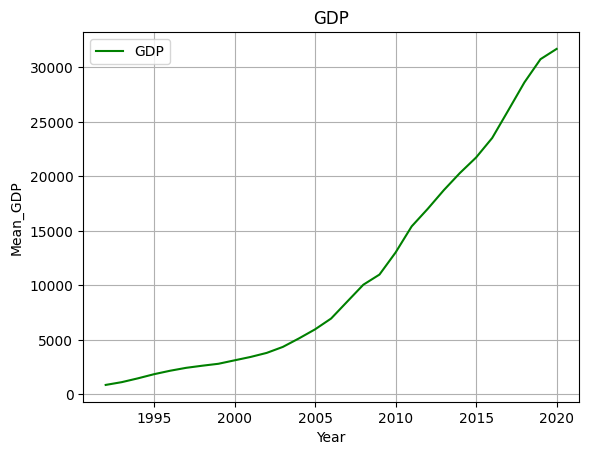

In [7]:
plt.plot(df['Year'], df['Mean_GDP'], label='GDP', color='g')
plt.xlabel("Year")
plt.ylabel('Mean_GDP')
plt.title('GDP')
plt.grid(True)
plt.legend()
plt.show()


2.CO2 EMISSION

In [8]:
df = pd.read_csv('co2.csv', encoding='latin1')
df.head(3)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/kmï¿½
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/kmï¿½
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/kmï¿½


In [9]:
df['co2 emition per person(tons)']=df['CO2 emission (Tons)']/df['Population(2022)']
df['co2 emition per person(tons)']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
59615    45.125172
59616    45.712263
59617    46.438609
59618    47.109487
59619    47.754769
Name: co2 emition per person(tons), Length: 59620, dtype: float64

In [ ]:
df2 = df.groupby('Year').agg({"co2 emition per person(tons)": "median"}).reset_index()
df3 = df[df['Country'] == 'China'].groupby('Year').agg({"co2 emition per person(tons)": "median"})
df2_filtered = df2[df2['Year'] > 1900]
df2_filtered

,Year,co2 emition per person(tons)
151,1901,0.000000
152,1902,0.000000
153,1903,0.000000
154,1904,0.000000
155,1905,0.000000
...,...,...
266,2016,86.441813
267,2017,90.774082
268,2018,94.946896
269,2019,98.985236


In [11]:
df3.head(2)

,co2 emition per person(tons)
Year,
1750,0.0
1751,0.0


In [12]:
df3 = df3.reset_index()

In [13]:
print(df3.columns)


Index(['Year', 'co2 emition per person(tons)'], dtype='object')


In [14]:
df3_filtered = df3[df3['Year'] > 1900]
df3_filtered.reset_index(drop=True)

,Year,co2 emition per person(tons)
0,1901,0.000067
1,1902,0.000134
2,1903,0.001511
3,1904,0.002976
4,1905,0.004587
...,...,...
115,2016,136.055630
116,2017,143.068807
117,2018,150.081984
118,2019,157.796478


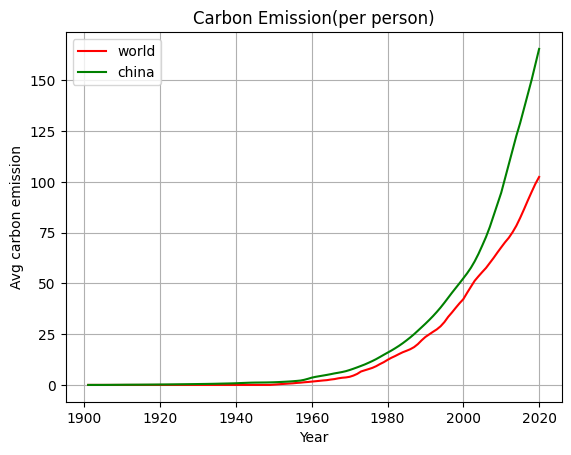

In [15]:
plt.plot(df2_filtered['Year'], df2_filtered['co2 emition per person(tons)'], label='world', color='r')
plt.plot(df3_filtered['Year'], df3_filtered['co2 emition per person(tons)'].values,label= 'china',color='g')
plt.xlabel("Year")
plt.ylabel('Avg carbon emission')
plt.title('Carbon Emission(per person)')
plt.grid(True)
plt.legend()
plt.show()

total carbon emition

In [16]:

df3 = df[df['Country'] == 'China'].groupby('Year').agg({"CO2 emission (Tons)": "median"})


In [17]:
df3 = df3.reset_index()

In [18]:
df3_filtered = df3[df3['Year'] > 1900]
df3_filtered.reset_index(drop=True)

,Year,CO2 emission (Tons)
0,1901,9.526400e+04
1,1902,1.905280e+05
2,1903,2.154432e+06
3,1904,4.242912e+06
4,1905,6.540240e+06
...,...,...
115,2016,1.940000e+11
116,2017,2.040000e+11
117,2018,2.140000e+11
118,2019,2.250000e+11


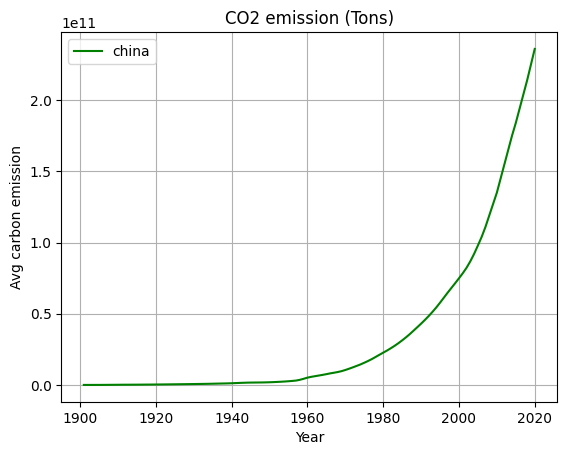

In [19]:

plt.plot(df3_filtered['Year'], df3_filtered['CO2 emission (Tons)'].values,label= 'china',color='g')
plt.xlabel("Year")
plt.ylabel('Avg carbon emission')
plt.title('CO2 emission (Tons)')
plt.grid(True)
plt.legend()
plt.show()

co2 emission end

3.Tempreature


In [20]:
df = pd.read_csv('temperature.csv')
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1.0,1.0,1995.0,64.2
1,Africa,Algeria,NaN,Algiers,1.0,2.0,1995.0,49.4
2,Africa,Algeria,NaN,Algiers,1.0,3.0,1995.0,48.8
3,Africa,Algeria,NaN,Algiers,1.0,4.0,1995.0,46.4
4,Africa,Algeria,NaN,Algiers,1.0,5.0,1995.0,47.9
...,...,...,...,...,...,...,...,...
1014929,Middle East,Israel,NaN,Tel Aviv,10.0,24.0,1995.0,90.0
1014930,Middle East,Israel,NaN,Tel Aviv,10.0,25.0,1995.0,90.0
1014931,Middle East,Israel,NaN,Tel Aviv,10.0,26.0,1995.0,90.0
1014932,Middle East,Israel,NaN,Tel Aviv,10.0,27.0,1995.0,90.0


In [21]:
df1 = df[df['Country'] == 'China'].groupby('Year').agg({"AvgTemperature": "median"})
df1.head(3)

,AvgTemperature
Year,
1995.0,62.20
1996.0,62.75
1997.0,64.50


In [22]:
df1 = df1.reset_index()
df1.head(4)

,Year,AvgTemperature
0,1995.0,62.20
1,1996.0,62.75
2,1997.0,64.50
3,1998.0,66.80


In [23]:
df1.tail()

,Year,AvgTemperature
21,2016.0,65.8
22,2017.0,64.9
23,2018.0,66.5
24,2019.0,67.0
25,2020.0,54.0


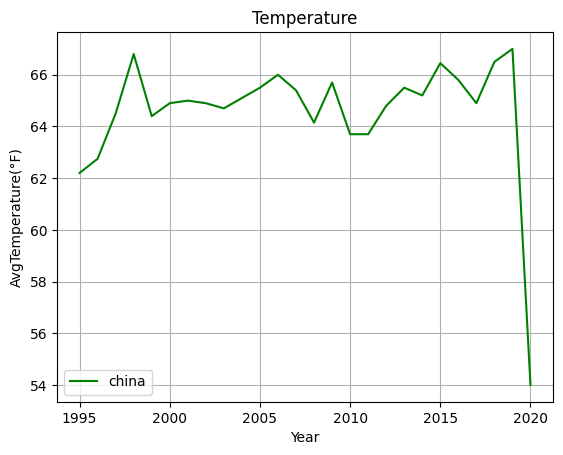

In [24]:
plt.plot(df1['Year'], df1['AvgTemperature'].values,label= 'china',color='g')
plt.xlabel("Year")
plt.ylabel('AvgTemperature(°F)')
plt.title('Temperature')
plt.grid(True)
plt.legend()
plt.show()

The temp start decreasing from 2018 due to outerlir, data error , and incomplete datasets

CONLUSION--->>>
1. carbon emission is directly propersional to the economic growth of the country
2. carbon emission is directly propersional to the change in the temprature
3. cahnge in earth avg temprature is directly proportion to the cahnge in the sea level 
4. carbon emission of country is directly propertion to the population of the country 
5. carbon emission of country is not depend on the area of country
6. carbon emission is diresctly propersion to ecomic size of contry ,i.e develop country emit more carbon and so on.
